In [3]:
# fit an ARIMA model and plot residual errors
from datetime import date
import pandas as pd
import pandas_datareader as data

# fit an ARIMA model and plot residual errors
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


In [4]:
#Saham yang akan dimodelkan
#,"ASII.JK","ICBP.JK","JSMR.JK"
tickers = "ANTM.JK"
#range dari tanggal yang dibutuhkan
today = date.today()
# print(today)
start_date = '2010-01-01'
# end_date = today
end_date = '2022-03-10'
#ambil data
panel_data = data.DataReader(tickers, 'yahoo',start_date, end_date)
panel_data


close = panel_data["Close"]

all_weekdays = pd.date_range(start = start_date,    end= end_date, freq='B')

close = close.reindex(all_weekdays)

close = close.dropna()

# # #print(all_weekdays)

dataframe = close
dataset = dataframe.values
# dataset = dataset.astype('float32')

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3024
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -15321.631
Date:                Sun, 13 Mar 2022   AIC                          30645.262
Time:                        01:35:06   BIC                          30651.276
Sample:                             0   HQIC                         30647.424
                               - 3024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1478.0782     10.176    145.247      0.000    1458.133    1498.023
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):             86674.06
Prob(Q):                              0.53   Pr

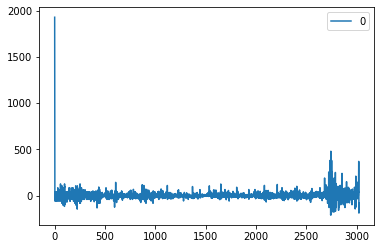

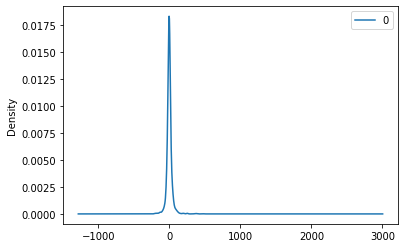

                 0
count  3024.000000
mean      0.849868
std      52.081842
min    -210.000000
25%     -15.000000
50%       0.000000
75%      10.000000
max    1931.946777


In [5]:
# fit model
model = ARIMA(dataset, order=(0,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [1]:
size = int(len(dataset) * 0.67)
train, test = dataset[0:size], dataset[size:len(dataset)]
history = [x for x in train]
predictions = list()

NameError: name 'dataset' is not defined

In [9]:
from time import time

start = time()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

print("total time: ", time()-start, 'seconds')

predicted=2580.173206, expected=820.000000
predicted=744.878605, expected=805.000000
predicted=810.388035, expected=835.000000
predicted=835.060694, expected=820.000000
predicted=819.436927, expected=790.000000
predicted=789.265691, expected=785.000000
predicted=785.145717, expected=775.000000
predicted=774.738149, expected=770.000000
predicted=769.952720, expected=775.000000
predicted=775.193498, expected=775.000000
predicted=774.947756, expected=795.000000
predicted=795.597168, expected=805.000000
predicted=805.095006, expected=775.000000
predicted=774.019295, expected=800.000000
predicted=801.046659, expected=805.000000
predicted=804.876490, expected=850.000000
predicted=851.300126, expected=850.000000
predicted=849.552065, expected=865.000000
predicted=865.468699, expected=865.000000
predicted=864.847625, expected=880.000000
predicted=880.452542, expected=880.000000
predicted=879.851276, expected=880.000000
predicted=880.008442, expected=885.000000
predicted=885.146373, expected=88

Test RMSE: 55.344
Test MAE: 30.79 MAE
Train R2 Score: 0.99 R2 Score


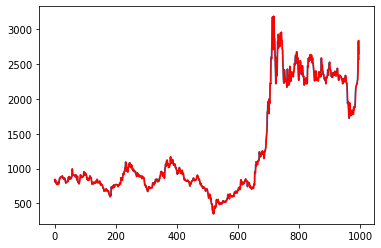

In [8]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.2f MAE' % (mae))
r2Score = r2_score(test, predictions)
print('Train R2 Score: %.2f R2 Score'% (r2Score))
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.savefig('arima_jsmr')
pyplot.show()